In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
crime_data = pd.read_csv('data/Cities - Crime.csv')

In [3]:
crime_data

,#,Name,State,Violent Crime Rates (2018),"VCR per 100,000 People",% Change (2010-2020)
0,0,New York City,New York,46113,549.61,7.69
1,1,Los Angeles,California,30126,757.39,2.67
2,2,Chicago,Illinois,27357,1012.69,1.92
3,3,Houston,Texas,24062,1037.79,9.69
4,4,Phoenix,Arizona,12110,731.87,11.21
...,...,...,...,...,...,...
183,183,McAllen,Texas,122,85.60,9.52
184,184,Thornton,Colorado,378,271.26,19.50
185,185,Visalia,California,450,337.26,13.76
186,186,Denton,Texas,439,317.39,24.47


## Questions To Ask
<p>Is there a relationship between crime rates and population growth?<p>
    <ul><li>Yes there is a statistically significant result (t-stat = -5.277), but the correlation is weak (r<sup>2</sup> = .130).</li></ul>
    <ul><li>Crime rates do appear to impact city growth (e.g. people moving away from unsafe cities), but does not appear to be the primary  reason. In addition, it is not clear whether this relationship is causal. (e.g. it might be that poor economic conditions in cities cause people to leave and to commit more crime at the same time)</li></ul>

In [9]:
y = crime_data['% Change (2010-2020)']
x = crime_data['VCR per 100,000 People']

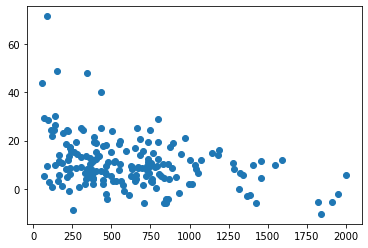

In [10]:
plt.scatter(x,y)

In [12]:
y = crime_data['% Change (2010-2020)']
x = crime_data['VCR per 100,000 People']

x1 = sm.add_constant(x)
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     % Change (2010-2020)   R-squared:                       0.130
Model:                              OLS   Adj. R-squared:                  0.126
Method:                   Least Squares   F-statistic:                     27.85
Date:                  Tue, 23 Aug 2022   Prob (F-statistic):           3.63e-07
Time:                          11:22:34   Log-Likelihood:                -696.71
No. Observations:                   188   AIC:                             1397.
Df Residuals:                       186   BIC:                             1404.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     16.4218      1.313     12.510      0.000      13.832      19.012
VCR per 100,000 People    -0.0094      0.002     -5.277      0.000      -0.013      -0.006
==============================================================================
Omnibus:                       77.506   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.121
Skew:                           1.555   Prob(JB):                     1.70e-73
Kurtosis:                       8.754   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""